![Futuristic electric car charging](ev_charging.png)

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   year     sales
0  2011   17763.0
1  2012   53171.0
2  2013   97102.0
3  2014  118882.0
4  2015  114023.0
5  2016  159616.0
6  2017  195581.0
7  2018  361315.0
8  2019  326644.0


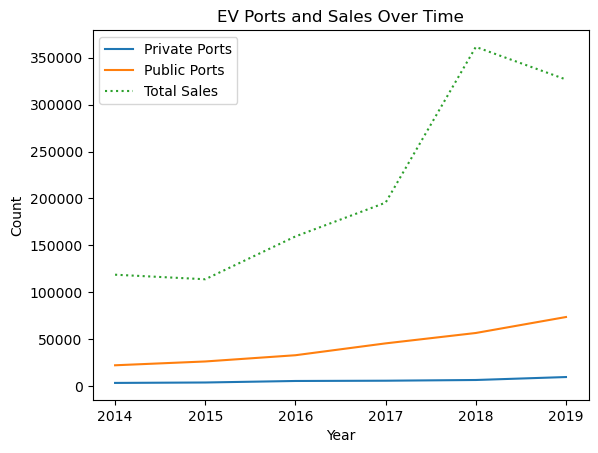

In [3]:
# Load the datasets
private_ev_charging = pd.read_csv("private_ev_charging.csv")
public_ev_charging = pd.read_csv("public_ev_charging.csv")
ev_sales = pd.read_csv("ev_sales.csv")

# Perform an outer join to keep only the rows with complete information
df_combined = private_ev_charging.merge(public_ev_charging, on='year', how='outer', indicator=True)
df_temp = df_combined[df_combined['_merge'] == 'both']

# Drop the _merge column as it's no longer needed
df_temp = df_temp.drop(columns=['_merge'])

# Get total sales grouping by each year
ev_total_sales = ev_sales.groupby('year')['sales'].sum().reset_index()

# Inspect the data and save the variable
print(ev_total_sales)
ev_sales_2018 = 361315

# Left-join with sales
df_complete = df_temp.merge(ev_total_sales, how='left', on='year')

# Drop any rows with null values
df_complete = df_complete.dropna(subset="sales")

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each line
sns.lineplot(data=df_complete, x='year', y='private_ports', label='Private Ports')
sns.lineplot(data=df_complete, x='year', y='public_ports', label='Public Ports')
sns.lineplot(data=df_complete, x='year', y='sales', label='Total Sales', linestyle=':')

# Adding titles and labels
ax.set_title('EV Ports and Sales Over Time')
ax.set(xlabel='Year', ylabel='Count')

# Show the legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

# Did vehicle sales and number of private and public ports show the same trend?
trend = "same"